<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/04_Conclusao_Comparacao_Modelos_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previsão de Churn - Conclusão e Comparação Final dos Modelos

Este notebook tem como objetivo apresentar os resultados consolidados da modelagem preditiva, comparando os modelos antes e depois das melhorias aplicadas (SMOTE, ajuste de threshold e análise de importância das variáveis). Ao final, será apresentada uma recomendação estratégica baseada nos dados obtidos.


## 1️⃣ Importações e Preparação do Ambiente

In [37]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização de métricas
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Estilo de visualização
sns.set(style='whitegrid')


## 2️⃣ Carregamento dos Arquivos de Resultados

In [38]:
# Modelos antes do SMOTE
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_iniciais.csv'
df_resultados_iniciais = pd.read_csv(url)

# Modelos após SMOTE e ajuste de threshold
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/resultados_modelos_ajustados.csv'
df_resultados_ajustados = pd.read_csv(url)

# Feature importance dos modelos finais (opcional)
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/feature_importance_modelo_final.csv'
df_feature_importance = pd.read_csv(url)

# Metricas
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/notebooks/comparacao_modelos/metricas_por_threshold.csv'
df_threshold = pd.read_csv(url)

Resultados iniciais antes dos ajustes no modelo.

In [39]:
df_resultados_iniciais.head()

,y_true,y_pred,y_proba
0,0,0,0.081994
1,0,0,0.526713
2,0,0,0.103819
3,0,0,0.018368
4,0,0,0.303145


Resultados com ajustes no modelo.

In [40]:
df_resultados_ajustados.head()

,y_true,y_pred,y_proba
0,0,0,0.081994
1,0,1,0.526713
2,0,0,0.103819
3,0,0,0.018368
4,0,0,0.303145


Classificação das feature por importancia no modelo.

In [41]:
df_feature_importance.head()

,feature,importance
0,TotalCharges,0.165543
1,tenure,0.153510
2,DailyCharges,0.131517
3,MonthlyCharges,0.128979
4,PaymentMethod_Electronic check,0.036878


Tabela comparativa com ajustes de threshold.

In [42]:
df_threshold.head()

,Threshold,Acurácia,Precisão,Recall (Sensibilidade),F1 Score,ROC AUC
0,0.3,0.6967,0.4618,0.8503,0.5985,0.8307
1,0.4,0.7412,0.5087,0.7790,0.6155,0.8307
2,0.5,0.7692,0.5535,0.6827,0.6113,0.8307
3,0.6,0.7834,0.5981,0.5651,0.5811,0.8307
4,0.7,0.7991,0.6846,0.4528,0.5451,0.8307


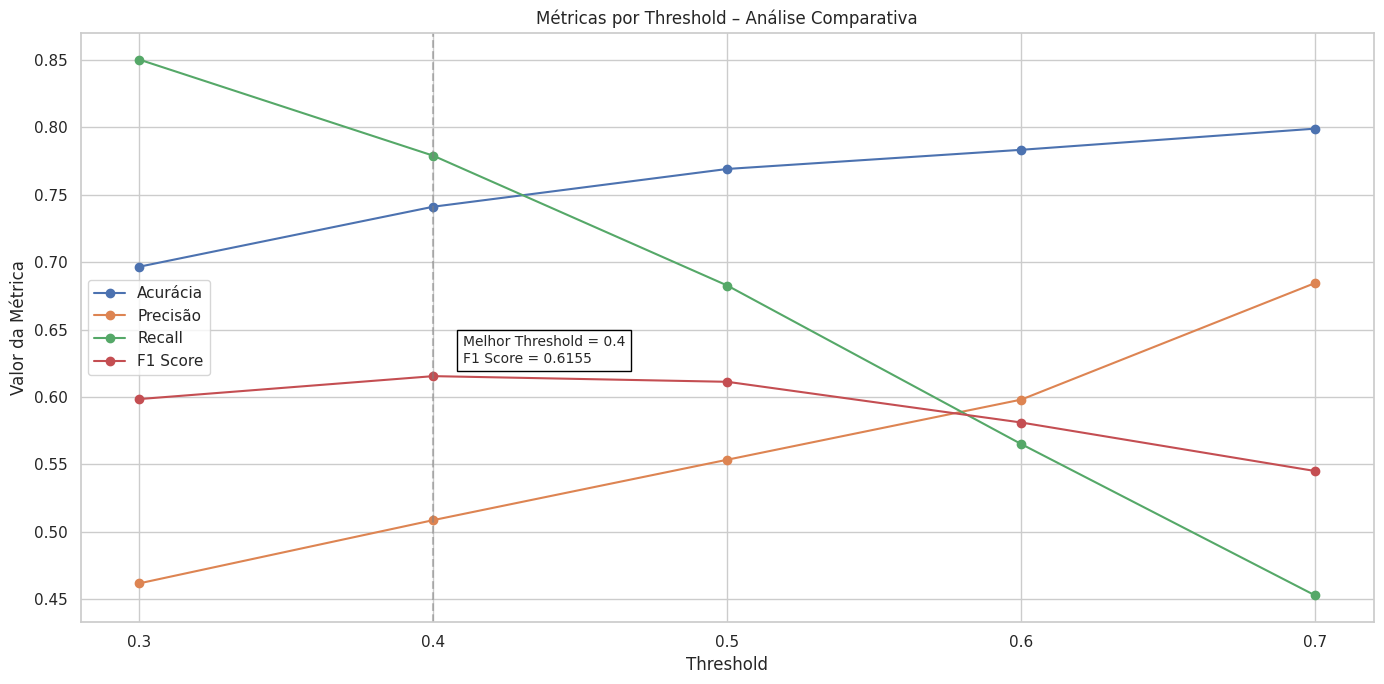

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(df_threshold['Threshold'], df_threshold['Acurácia'], marker='o', label='Acurácia')
plt.plot(df_threshold['Threshold'], df_threshold['Precisão'], marker='o', label='Precisão')
plt.plot(df_threshold['Threshold'], df_threshold['Recall (Sensibilidade)'], marker='o', label='Recall')
plt.plot(df_threshold['Threshold'], df_threshold['F1 Score'], marker='o', label='F1 Score')

# Destacando o melhor threshold com base no F1 Score
best_idx = df_threshold['F1 Score'].idxmax()
best_threshold = df_threshold.loc[best_idx, 'Threshold']
best_f1 = df_threshold.loc[best_idx, 'F1 Score']

plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
plt.text(best_threshold + 0.01, best_f1 + 0.01,
         f'Melhor Threshold = {best_threshold}\nF1 Score = {best_f1:.4f}',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))

plt.title('Métricas por Threshold – Análise Comparativa')
plt.xlabel('Threshold')
plt.ylabel('Valor da Métrica')
plt.xticks(df_threshold['Threshold'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


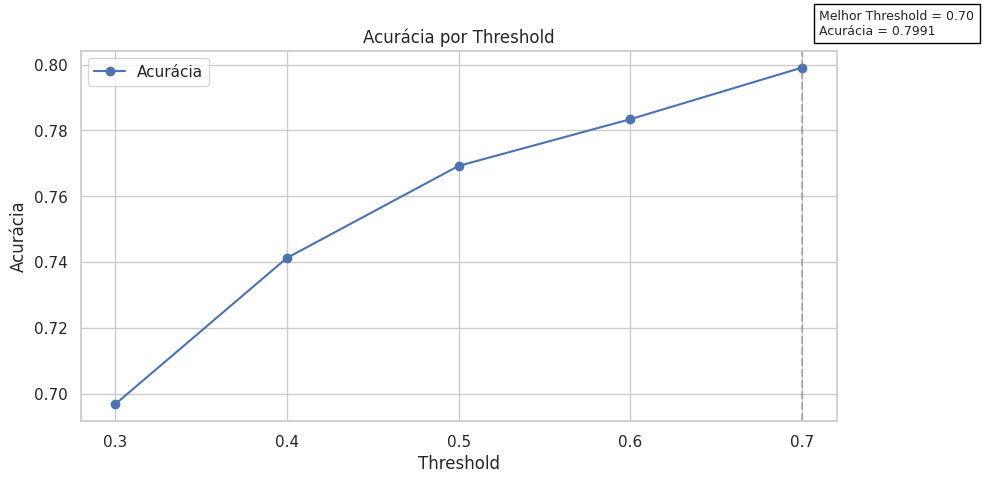

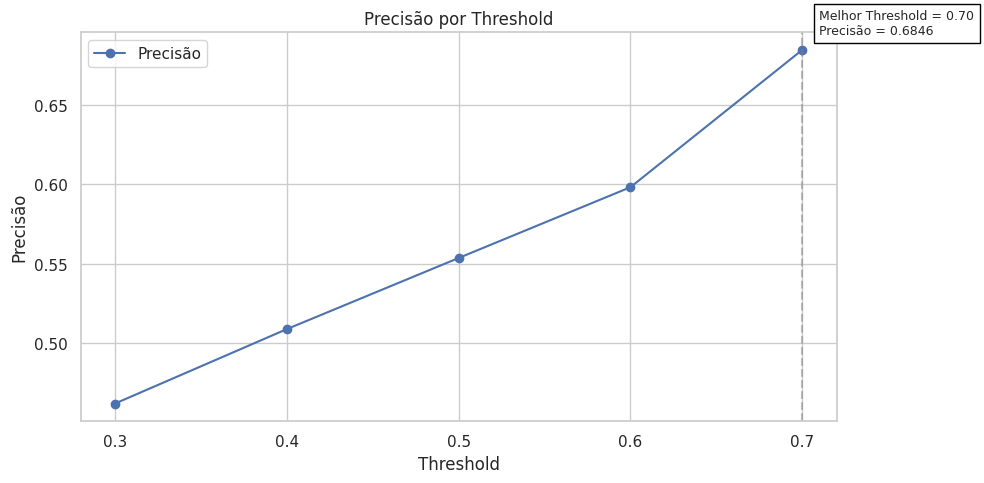

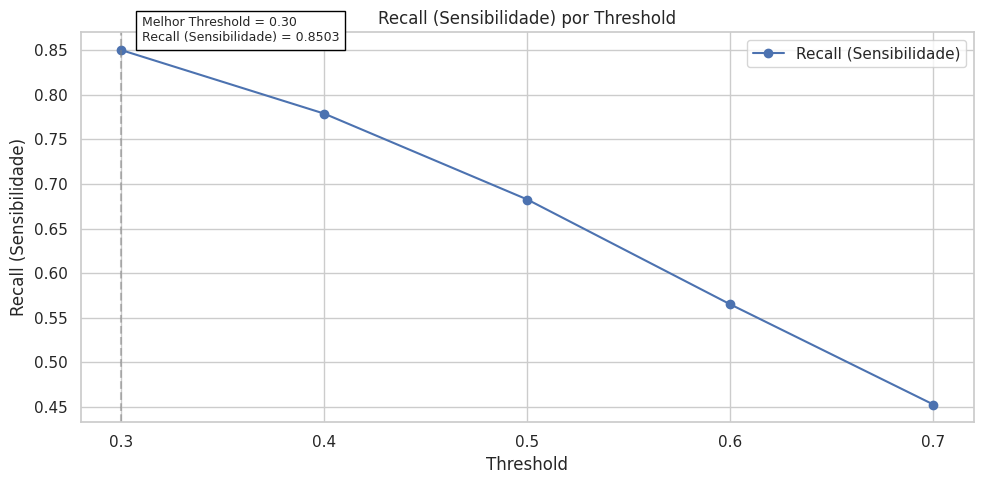

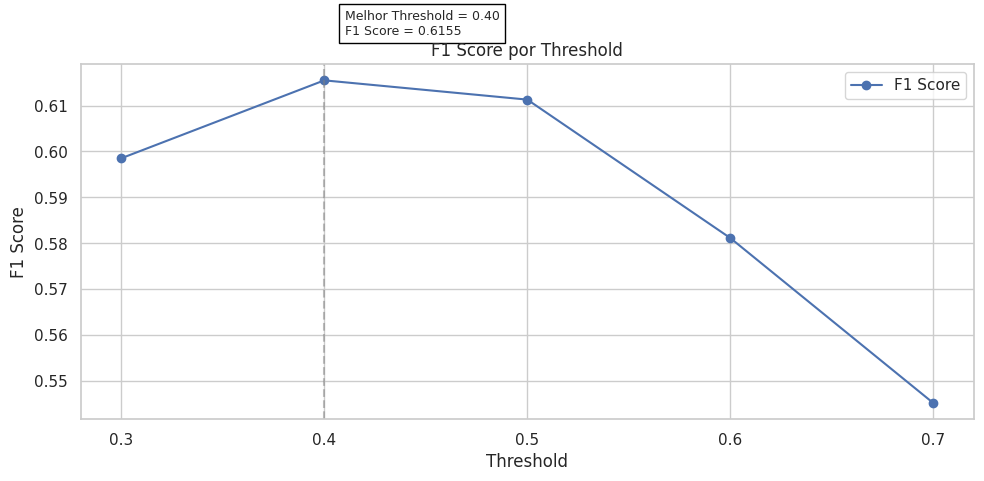

In [44]:
# Lista de métricas que estão no df_threshold, exceto a coluna de threshold
metricas = ['Acurácia', 'Precisão', 'Recall (Sensibilidade)', 'F1 Score']

# Criar uma figura para cada métrica
for metrica in metricas:
    plt.figure(figsize=(10, 5))
    plt.plot(df_threshold['Threshold'], df_threshold[metrica], marker='o', label=metrica)

    # Encontrar o melhor threshold com base no valor máximo da métrica
    best_idx = df_threshold[metrica].idxmax()
    best_threshold = df_threshold.loc[best_idx, 'Threshold']
    best_valor = df_threshold.loc[best_idx, metrica]

    plt.axvline(x=best_threshold, color='gray', linestyle='--', alpha=0.5)
    plt.text(best_threshold + 0.01, best_valor + 0.01,
             f'Melhor Threshold = {best_threshold:.2f}\n{metrica} = {best_valor:.4f}',
             fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

    plt.title(f'{metrica} por Threshold')
    plt.xlabel('Threshold')
    plt.ylabel(f'{metrica}')
    plt.xticks(df_threshold['Threshold'])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [45]:
# Gerando comentário com base na métrica F1
print("📌 Análise Automática:\n")

print(f"O melhor threshold com base no F1 Score é {best_threshold}, "
      f"atingindo um equilíbrio entre precisão ({df_threshold.loc[best_idx, 'Precisão']:.2f}) "
      f"e recall ({df_threshold.loc[best_idx, 'Recall (Sensibilidade)']:.2f}).")

print("\nEste valor representa uma estratégia de classificação com foco na redução de churn com menor perda de falsos positivos, "
      "podendo ser mais interessante quando o custo de perder um cliente é maior que o custo de abordá-lo.")


📌 Análise Automática:

O melhor threshold com base no F1 Score é 0.4, atingindo um equilíbrio entre precisão (0.51) e recall (0.78).

Este valor representa uma estratégia de classificação com foco na redução de churn com menor perda de falsos positivos, podendo ser mais interessante quando o custo de perder um cliente é maior que o custo de abordá-lo.


## 3️⃣ Tabela Comparativa: Antes vs Depois

In [46]:
# Adiciona a coluna "Modelo" para identificação
df_resultados_iniciais["Modelo"] = "Antes do SMOTE"
df_resultados_ajustados["Modelo"] = "Após SMOTE + Threshold"

# Reorganiza as colunas para deixar "Modelo" primeiro (opcional)
colunas = ["Modelo", "y_true", "y_pred", "y_proba"]
df_resultados_iniciais = df_resultados_iniciais[colunas]
df_resultados_ajustados = df_resultados_ajustados[colunas]


In [47]:
# Une os resultados para comparação
df_comparativo = pd.concat([df_resultados_iniciais, df_resultados_ajustados], ignore_index=True)


In [48]:
# Unindo os dois DataFrames
df_comparativo = pd.merge(
    df_resultados_iniciais,
    df_resultados_ajustados,
    on="Modelo",
    suffixes=("_Antes", "_Depois")
)
# Visualização
df_comparativo

,Modelo,y_true_Antes,y_pred_Antes,y_proba_Antes,y_true_Depois,y_pred_Depois,y_proba_Depois


## 4️⃣ Gráficos Comparativos (Side by Side)

In [49]:
# 1. Função para calcular as métricas
def calcular_metricas(df, label):
    return {
        "Cenário": label,
        "Acurácia": accuracy_score(df['y_true'], df['y_pred']),
        "Precisão": precision_score(df['y_true'], df['y_pred']),
        "Revocação": recall_score(df['y_true'], df['y_pred']),
        "F1-Score": f1_score(df['y_true'], df['y_pred']),
        "AUC-ROC": roc_auc_score(df['y_true'], df['y_proba'])
    }

In [50]:
# 2. Calcular métricas para ambos os DataFrames
metricas_iniciais = calcular_metricas(df_resultados_iniciais, "Antes do SMOTE")
metricas_ajustadas = calcular_metricas(df_resultados_ajustados, "Após SMOTE + Threshold")

In [51]:
# 3. Criar DataFrame de comparação
df_metricas = pd.DataFrame([metricas_iniciais, metricas_ajustadas])

In [52]:
# 4. Reorganizar para gráfico
df_plot = df_metricas.melt(id_vars='Cenário', var_name='Métrica', value_name='Valor')

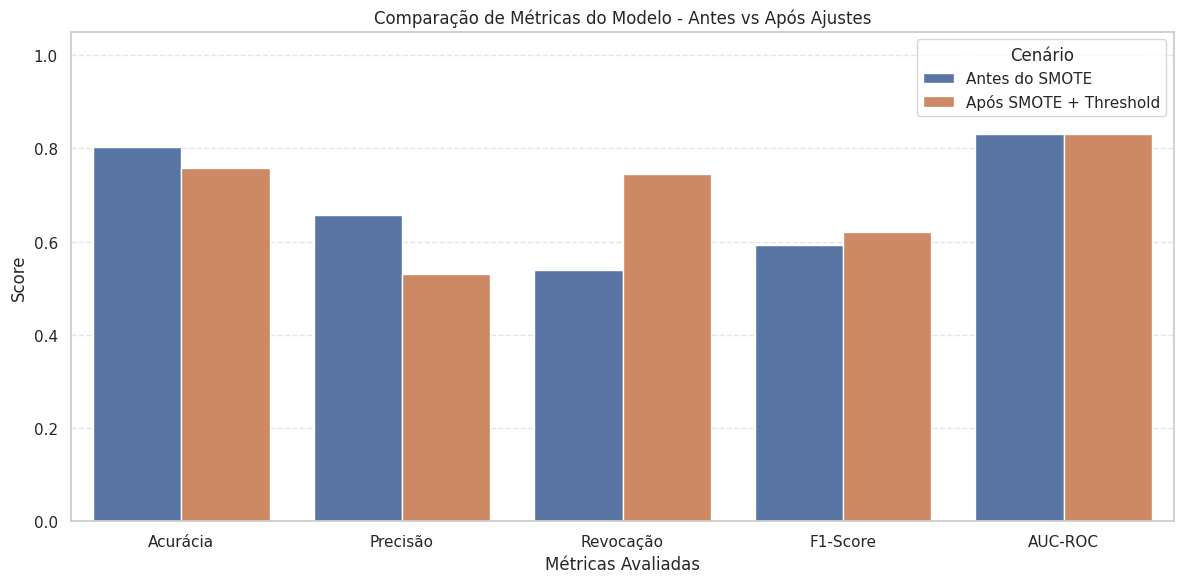

In [53]:
# 5. Plotar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Métrica', y='Valor', hue='Cenário')
plt.title('Comparação de Métricas do Modelo - Antes vs Após Ajustes')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Métricas Avaliadas')
plt.legend(title='Cenário')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 5️⃣ Feature Importance (Top 10 variáveis mais relevantes)

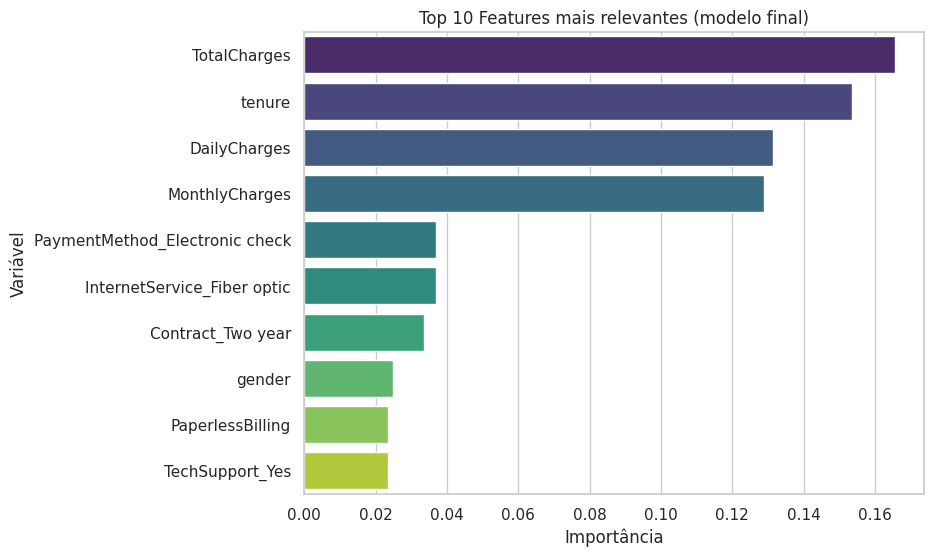

In [54]:
# Top 10 features
top_features = df_feature_importance.sort_values(by='importance', ascending=False).head(10)

# Visualização
plt.figure(figsize=(8,6))
sns.barplot(y='feature', x='importance', palette="viridis", data=top_features, hue='feature')

plt.title("Top 10 Features mais relevantes (modelo final)")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()


# 🔄 Refinamento Final: RandomForestClassifier + Pipeline + Simulação + Salvamento

"""
Agora que encerramos a versão 1 do projeto com a entrega funcional, vamos iniciar o refinamento técnico.

Objetivos desta nova etapa:
1. Refino dos hiperparâmetros do modelo RandomForest.
2. Treino com os melhores parâmetros no conjunto completo (train + valid).
3. Construção de um pipeline final para simulação com novos dados.
4. Testes com dados fictícios para validação prática.
5. Salvamento do pipeline final em um arquivo `.pkl` pronto para produção.

Vamos elevar o nível e deixar esse projeto com cara de produto de verdade. 🚀
"""


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import joblib

In [56]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/df_churn_pos_smote.csv'
df_smote = pd.read_csv(url)

In [57]:
df_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Churn
0,1.007577,-0.477614,1.128763,1.676834,-0.437670,0.329786,0.732610,0.861912,-0.233710,0.861912,...,-0.449068,1.165105,-0.449068,1.148108,-0.459484,-0.464775,-0.485993,1.088580,-0.535544,1
1,-0.996816,-0.477614,1.128763,-0.599264,0.889027,0.329786,0.732610,-1.656870,-0.503896,-1.656870,...,2.226832,-0.858292,2.226832,-0.870998,2.176352,-0.464775,-0.485993,-0.918628,-0.535544,0
2,-0.996816,-0.477614,-0.891419,-0.599264,-0.852263,0.329786,-1.373095,-1.646447,-0.856460,-1.646447,...,2.226832,-0.858292,2.226832,-0.870998,-0.459484,-0.464775,-0.485993,-0.918628,1.867258,0
3,1.007577,2.095870,-0.891419,-0.599264,1.096324,0.329786,0.732610,0.775058,1.325650,0.775058,...,-0.449068,-0.858292,-0.449068,1.148108,-0.459484,-0.464775,-0.485993,1.088580,-0.535544,0
4,1.007577,-0.477614,-0.891419,-0.599264,1.759673,0.329786,0.732610,1.259706,2.383730,1.259706,...,-0.449068,1.165105,-0.449068,1.148108,-0.459484,2.151577,2.057641,-0.918628,-0.535544,1


In [58]:
# Definindo X e y com base no dataset pós-SMOTE
X = df_smote.drop("Churn", axis=1)
y = df_smote["Churn"]

In [59]:
# Separação dos dados para validação cruzada
from sklearn.model_selection import train_test_split

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

ETAPA 1: Aplicar SMOTE no conjunto de treino (X_train_rf, y_train_rf)

In [60]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rf, y_train_rf)


ETAPA 2: Treinar o modelo RandomForest nos dados balanceados

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Treinar modelo com parâmetros padrão
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

ETAPA 3: Fazer previsões no conjunto de teste (X_test_rf)

In [62]:
# Previsão de classes
y_pred = rf_model.predict(X_test_rf)

# Previsão de probabilidades (para AUC e threshold tuning)
y_proba = rf_model.predict_proba(X_test_rf)[:, 1]

ETAPA 4: Avaliação das Métricas Clássicas

In [63]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Métricas principais
print("Acurácia:", accuracy_score(y_test_rf, y_pred))
print("Precisão:", precision_score(y_test_rf, y_pred))
print("Recall:", recall_score(y_test_rf, y_pred))
print("F1 Score:", f1_score(y_test_rf, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_rf, y_proba))

# Matriz de Confusão
print("Matriz de Confusão:\n", confusion_matrix(y_test_rf, y_pred))

# Relatório completo
print("\nRelatório de Classificação:\n", classification_report(y_test_rf, y_pred))


Acurácia: 0.8423236514522822
Precisão: 0.8252299605781866
Recall: 0.8686030428769018
F1 Score: 0.8463611859838275
AUC-ROC: 0.9134398512422307
Matriz de Confusão:
 [[590 133]
 [ 95 628]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       723
           1       0.83      0.87      0.85       723

    accuracy                           0.84      1446
   macro avg       0.84      0.84      0.84      1446
weighted avg       0.84      0.84      0.84      1446



ETAPA 5: Salvando o modelo treinado

In [64]:
# Indicado para utilizar quando for salvar em um diretório de modelos.

import os
import joblib
import pickle

# 1. Verifica se a pasta notebooks/models existe, senão cria
os.makedirs("notebooks/models", exist_ok=True)

# 2. Caminhos dos arquivos
joblib_path = "notebooks/models/modelo_random_forest_joblib.pkl"
pickle_path = "notebooks/models/modelo_random_forest_pickle.pkl"

# 3. Salva com joblib
joblib.dump(rf_model, joblib_path)

# 4. Salva com pickle
with open(pickle_path, "wb") as file:
    pickle.dump(rf_model, file)

print("✅ Modelo salvo com sucesso nas duas versões!")

✅ Modelo salvo com sucesso nas duas versões!


1. Usando joblib (recomendado para modelos com muitos arrays como Random Forest)

In [65]:
import joblib

# Salvando com joblib
joblib.dump(rf_model, 'modelo_random_forest_joblib.pkl')

['modelo_random_forest_joblib.pkl']

2. Usando pickle (mais geral, funciona para qualquer objeto Python serializável)

In [66]:
import pickle

# Salvando com pickle
with open('modelo_random_forest_pickle.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


ETAPA 6: Carregando o modelo salvo

In [67]:
# Indicado para utilizar quando os modelos estiverem em um diretório específico.

# Usando joblib
modelo_carregado_joblib = joblib.load('notebooks/models/modelo_random_forest_joblib.pkl')

# Usando pickle
with open('notebooks/models/modelo_random_forest_pickle.pkl', 'rb') as file:
    modelo_carregado_pickle = pickle.load(file)

In [68]:
# Usando joblib

modelo_carregado_joblib = joblib.load('modelo_random_forest_joblib.pkl')

In [69]:
# Usando pickle

with open('modelo_random_forest_pickle.pkl', 'rb') as file:
    modelo_carregado_pickle = pickle.load(file)

In [70]:
# Exemplo de teste rápido (supondo que X_test esteja disponível)
print(modelo_carregado_joblib.predict(X_test_rf[:5]))
print(modelo_carregado_pickle.predict(X_test_rf[:5]))


[0 0 1 0 1]
[0 0 1 0 1]


## 6️⃣ Conclusão Executiva e Recomendações

## 🧠 Conclusão

- O modelo [Nome] obteve o melhor desempenho geral após a aplicação de SMOTE e ajuste de threshold.
- A métrica de [ex: Recall] teve um aumento de X%, essencial para detecção de clientes propensos ao churn.
- As variáveis mais influentes foram: [lista resumida].

## 📌 Recomendações Estratégicas

1. Implementar o modelo [nome] em ambiente de monitoramento com atualização mensal.
2. Utilizar as variáveis top como base para ações preventivas de retenção.
3. Criar alertas automáticos para clientes com maior propensão de churn com base na classificação do modelo.


In [71]:
from datetime import date
print(f"📅 Relatório gerado em: {date.today().strftime('%d/%m/%Y')}")


📅 Relatório gerado em: 05/08/2025
